In [1]:
import sys
import yfinance as yf
import mplfinance as mpf
import pandas as pd

print(sys.executable)

C:\Users\david\Anaconda_23\envs\machineLearning\python.exe


The first task is to retrieve stock price data of Netflix for fiscal 2023. The granularity of the data is daily.

In [4]:
NFLX = yf.Ticker('NFLX')

data = NFLX.history(start = "2023-01-01", end = "2023-12-31")

data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,298.059998,298.390015,288.700012,294.950012,6764000,0.0,0.0
2023-01-04 00:00:00-05:00,298.239990,311.140015,295.510010,309.410004,9345100,0.0,0.0
2023-01-05 00:00:00-05:00,307.000000,314.179993,304.549988,309.700012,8328400,0.0,0.0
2023-01-06 00:00:00-05:00,311.570007,316.769989,303.690002,315.549988,8959800,0.0,0.0
2023-01-09 00:00:00-05:00,316.829987,321.700012,313.220001,315.170013,6766600,0.0,0.0
2023-01-10 00:00:00-05:00,311.070007,329.350006,311.070007,327.540009,13072300,0.0,0.0
2023-01-11 00:00:00-05:00,326.500000,328.880005,321.350006,327.260010,9579700,0.0,0.0
2023-01-12 00:00:00-05:00,332.500000,332.950012,323.140015,330.130005,10856200,0.0,0.0
2023-01-13 00:00:00-05:00,329.970001,336.649994,328.890015,332.820007,8286800,0.0,0.0


The next task is retrieving the 5 most recent days with 1 minute intervals as it relates to Netflix price data. The granularity here is 1 minute.

In [5]:
minuteData = NFLX.history(period='5d', interval='1m')

minuteData.head(100)

minuteData.tail(100)

minuteData.index

DatetimeIndex(['2024-02-26 09:30:00-05:00', '2024-02-26 09:31:00-05:00',
               '2024-02-26 09:32:00-05:00', '2024-02-26 09:33:00-05:00',
               '2024-02-26 09:34:00-05:00', '2024-02-26 09:35:00-05:00',
               '2024-02-26 09:36:00-05:00', '2024-02-26 09:37:00-05:00',
               '2024-02-26 09:38:00-05:00', '2024-02-26 09:39:00-05:00',
               ...
               '2024-03-01 15:50:00-05:00', '2024-03-01 15:51:00-05:00',
               '2024-03-01 15:52:00-05:00', '2024-03-01 15:53:00-05:00',
               '2024-03-01 15:54:00-05:00', '2024-03-01 15:55:00-05:00',
               '2024-03-01 15:56:00-05:00', '2024-03-01 15:57:00-05:00',
               '2024-03-01 15:58:00-05:00', '2024-03-01 15:59:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=1939, freq=None)

The next task is make candlestick plots for the data. The hollow_and_filled plots are used because the style reveals more information. E.g. If the candle is hollow green, it means the price closed at a higher price than it opened. If the candle is filled green, then it means the stock closed at the high price. The volume bars always show the same color as the corresponding price candles.
Reference; https://github.com/matplotlib/mplfinance/blob/master/examples/hollow_and_filled_candles.ipynb
https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb

Below, there are different plots and data granularity shown in the plots. I.e. 1. Daily price for fiscal 2023 2. 5 days with 1 minute candles 3. 1 day with 1 minute candles. Various types and styles are used in the plots to show a bit of what the library can do. The classic daily chart has moving averages added with (2, 10, 50) data points used to calculate. The moving averages can be seen as lines in the plot.

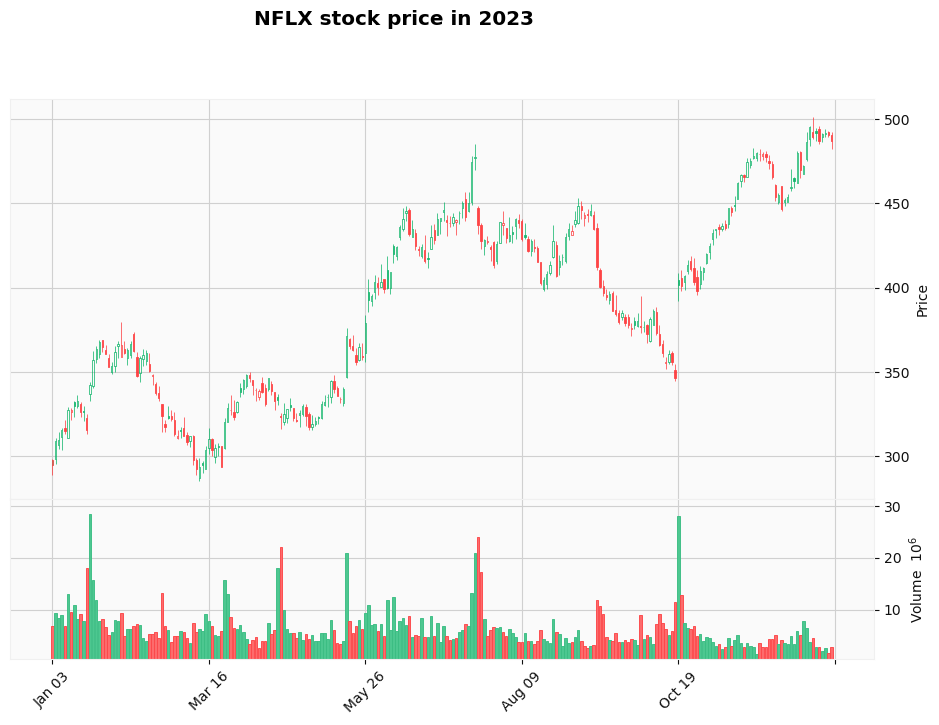

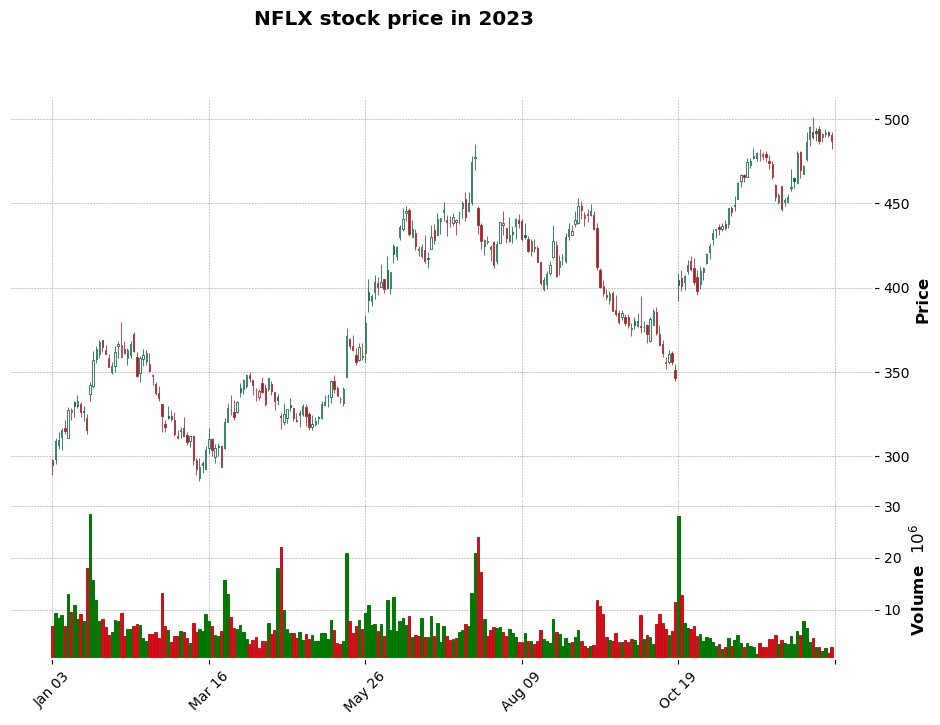

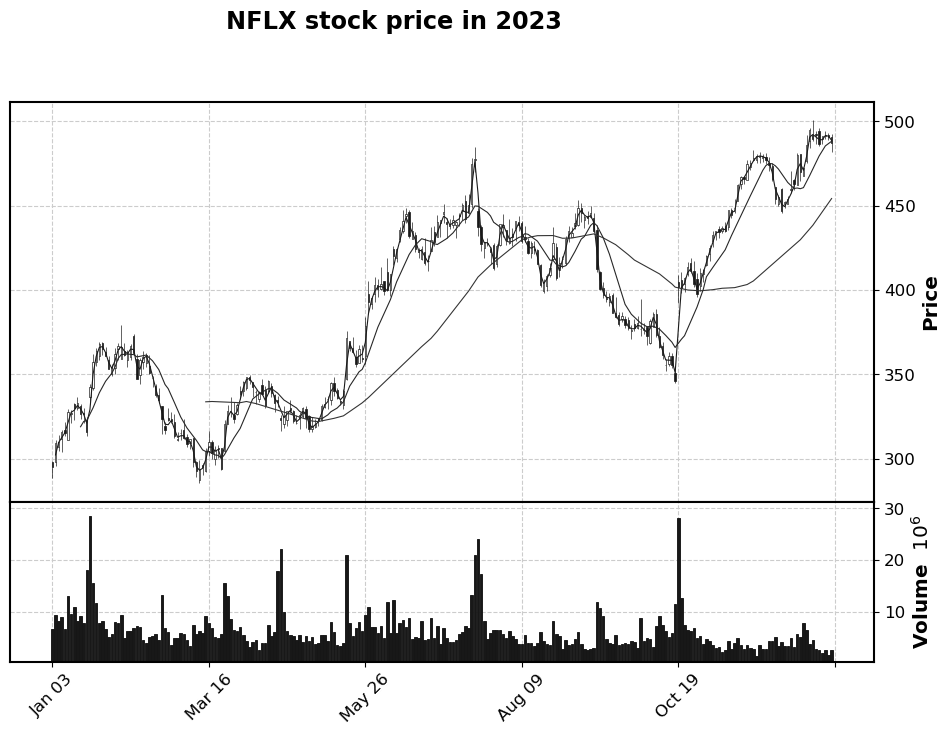

In [6]:
kwargs = dict(type = 'hollow_and_filled', volume = True, figratio = (20, 10), figscale = 1, figsize = (12, 8), title = "NFLX stock price in 2023") 

mpf.plot(data, **kwargs, style = 'yahoo')

mpf.plot(data, **kwargs, style = 'charles')

kwargs = dict(type = 'candle', volume = True, figratio = (20, 10), mav = (2, 10, 50), figscale = 1, figsize = (12, 8), title = "NFLX stock price in 2023")

mpf.plot(data, **kwargs, style = 'classic')

C:\Users\david\Anaconda_23\envs\machineLearning\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


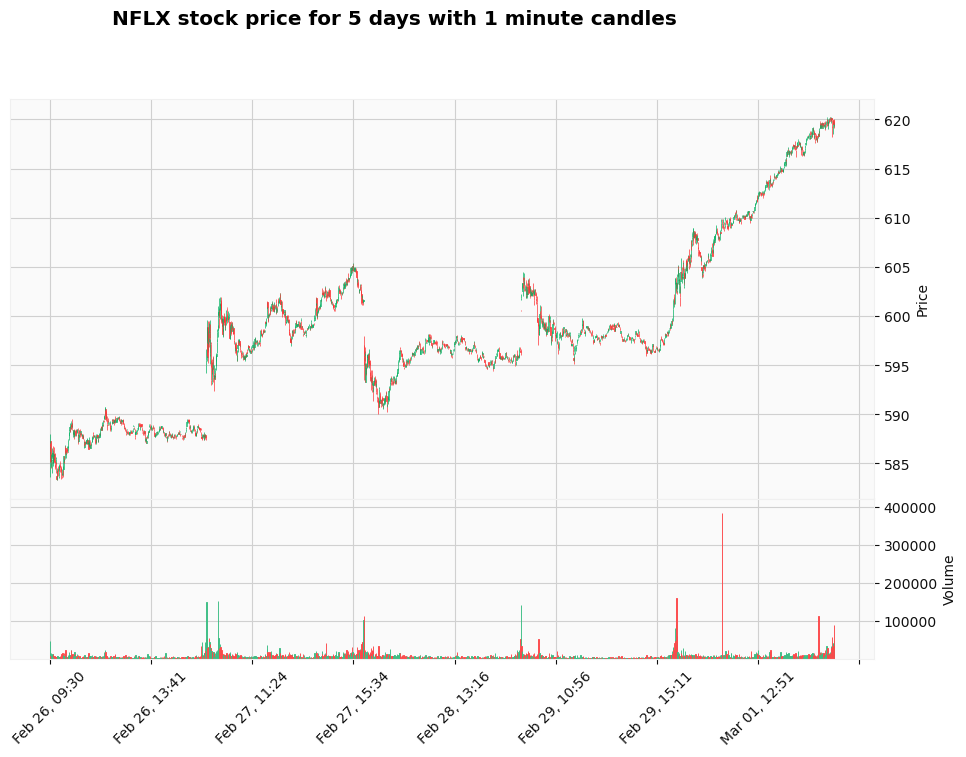

C:\Users\david\Anaconda_23\envs\machineLearning\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


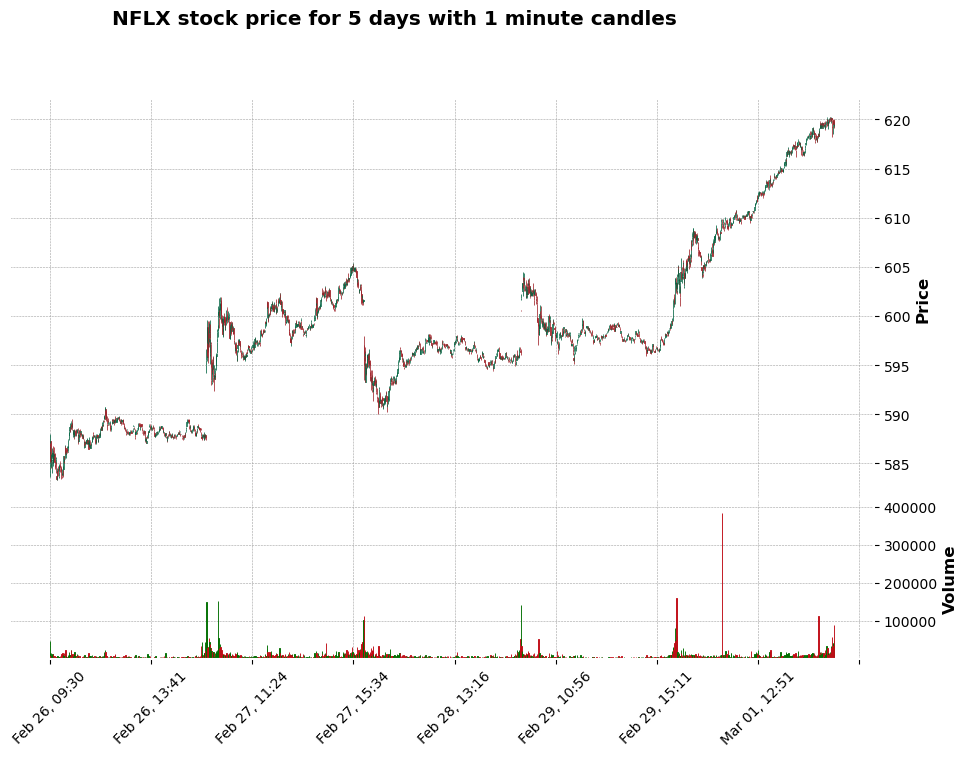

In [7]:
kwargs = dict(type = 'hollow_and_filled', volume = True, figratio = (20, 10), figscale = 0.85, figsize = (12, 8), title = "NFLX stock price for 5 days with 1 minute candles") 

mpf.plot(minuteData, **kwargs, style = 'yahoo')

mpf.plot(minuteData, **kwargs, style = 'charles')


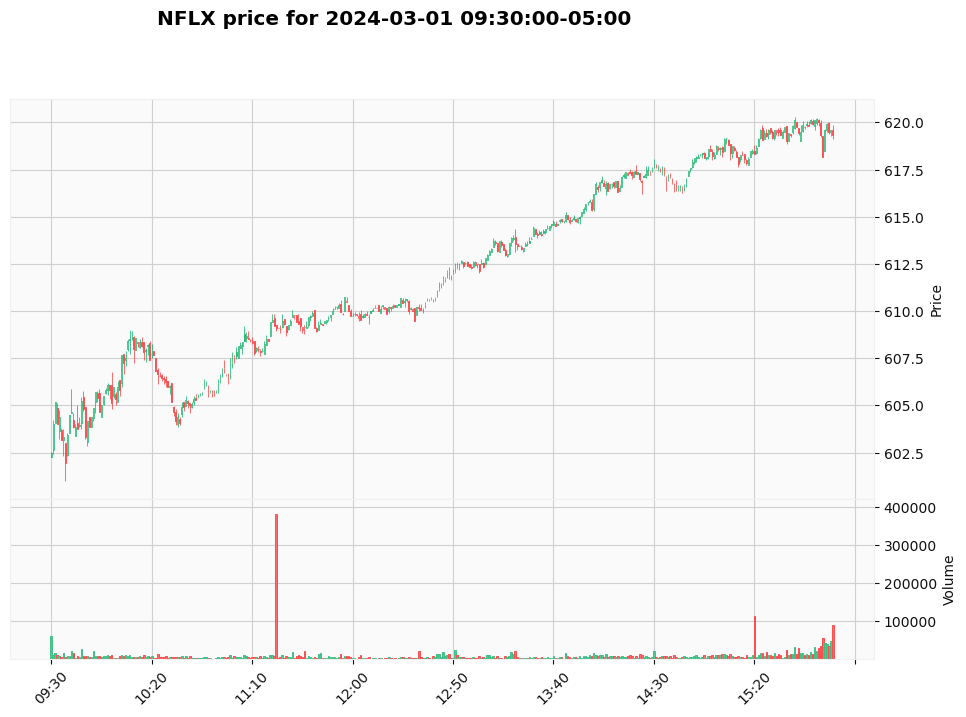

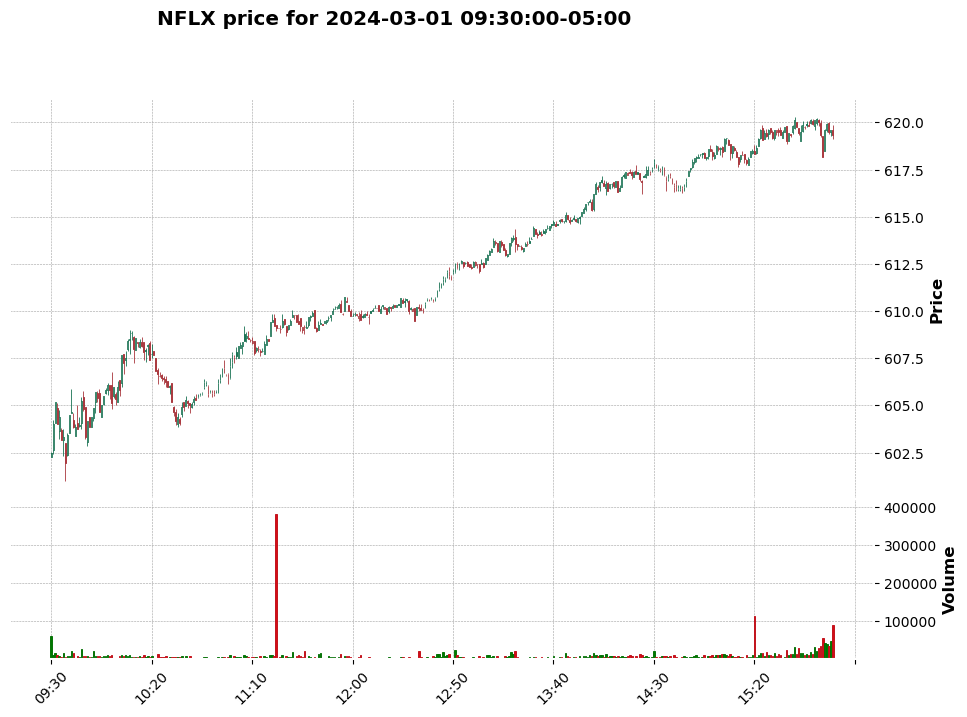

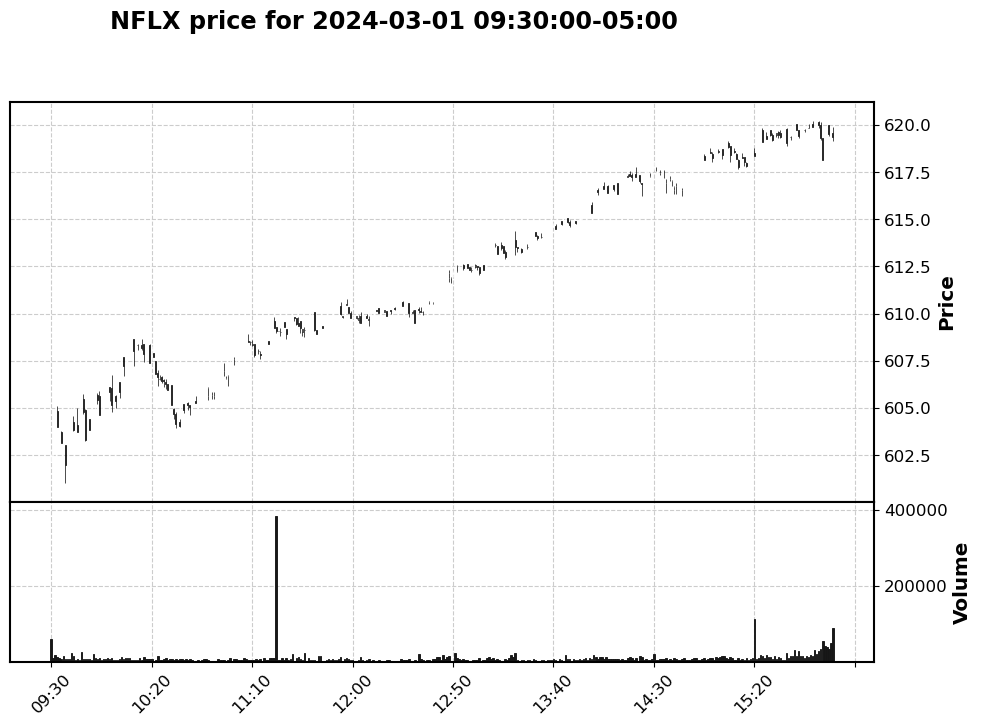

In [18]:
myData = NFLX.history(period = '1d', interval = '1m')

i = str(myData.index[0])

# print(i)

plTitle = "NFLX price for " + i

# print(myTitle)

kwargs = dict(type = 'hollow_and_filled', volume = True, figratio = (20, 10), figscale = 0.85, figsize = (12, 8), title = plTitle) 

mpf.plot(myData, **kwargs, style = 'yahoo')

mpf.plot(myData, **kwargs, style = 'charles')

mpf.plot(myData, **kwargs, style = 'classic')

The next task in the project is to implement machine learning to do time series predictions. I will try to use the model to predict in two different ways. I.e. 1 minute prices for a particular day. 2. Daily prices for some number of days. The type of model implemented is a Long Short-Term Memory or LSTM. It is a type of neural network and can be classified as a recurrent neural network.